## 1. Fetch the data


In [2]:
import requests
import json
import pandas as pd
import time

In [8]:
key = "" 
headers = { 'apikey': key, 'Accept': 'application/json'}

with open("data/ids.txt", "r") as fp:
    ids = fp.read()
    
ids = ids.split(",")

In [9]:
# columns = ["id", "latitude", "longitude", "city", "street", "number", "elevation"]
# df = pd.DataFrame(columns=columns)
# 
# def get_location_info(id):
#     url = f'https://airapi.airly.eu/v2/installations/{id}'
#     r = requests.get(url, headers)
#     tmp_dict = json.loads(r.content)   
#     try:
#         my_id = tmp_dict['id']
#     except KeyError:
#         print(tmp_dict)
#         return None
#     latitude = tmp_dict["location"]["latitude"]
#     longitude = tmp_dict["location"]["longitude"]
#     city = tmp_dict["address"]["city"]
#     street = tmp_dict["address"]["street"]
#     number = tmp_dict["address"]["number"]
#     elevation = tmp_dict["elevation"]
# 
#     row = {"id": my_id, "latitude": latitude, "longitude": longitude, "city": city, "street": street,"number":number, "elevation": elevation}
#     return row
# 
# 
# for id in ids[:50]:
#     row = get_location_info(id)
#     if row is not None:
#         df = df.append(row, ignore_index=True)   
# time.sleep(60) #APi limit is 50 requests per minute
# 
# for id in ids[50:100]:
#     row = get_location_info(id)
#     if row is not None:
#         df = df.append(row, ignore_index=True)   
# time.sleep(60)
# 
# for id in ids[100:150]:
#     row = get_location_info(id)
#     if row is not None:
#         df = df.append(row, ignore_index=True)   
# time.sleep(60)
# 
# for id in ids[150:200]:
#     row = get_location_info(id)
#     if row is not None:
#         df = df.append(row, ignore_index=True)   
# time.sleep(60)
# 
# for id in ids[200:]:
#     row = get_location_info(id)
#     if row is not None:
#         df = df.append(row, ignore_index=True)   
# 
# print(df)
# df.to_csv("data/locations.csv")



{'message': 'No API key found in request'}
{'message': 'No API key found in request'}
{'message': 'No API key found in request'}
{'message': 'No API key found in request'}
{'message': 'No API key found in request'}
{'message': 'No API key found in request'}
{'message': 'No API key found in request'}
{'message': 'API rate limit exceeded'}
{'message': 'API rate limit exceeded'}
{'message': 'API rate limit exceeded'}
{'message': 'API rate limit exceeded'}
       id   latitude  longitude            city                     street  \
0     820  50.052433  19.949579          Kraków                Starowiślna   
1    1081  50.055163  19.947015          Kraków                Starowiślna   
2     622  50.044424  19.952205          Kraków                    Krakusa   
3     842  50.042480  19.944330          Kraków                Kalwaryjska   
4      58  50.057447  19.946008          Kraków                     Dietla   
5    2277  50.056538  19.954229          Kraków                   Prochowa 

In [14]:
global df
def get_locations(locations_json):
    locations = json.loads(locations_json)   
    
    for tmp_dict in locations:
        try:
            my_id = tmp_dict['id']
        except KeyError:
            print(tmp_dict)
            continue
        latitude = tmp_dict["location"]["latitude"]
        longitude = tmp_dict["location"]["longitude"]
        city = tmp_dict["address"]["city"]
        street = tmp_dict["address"]["street"]
        number = tmp_dict["address"]["number"]
        elevation = tmp_dict["elevation"]
        row = {"id": my_id, "latitude": latitude, "longitude": longitude, "city": city, "street": street,"number":number, "elevation": elevation}
        global df
        df = df.append(row, ignore_index=True) 

columns = ["id", "latitude", "longitude", "city", "street", "number", "elevation"]
df = pd.DataFrame(columns=columns)
with open("data/locations.txt", "r") as fp:
    get_locations(fp.read())
    df.to_csv("data/location_const.csv")
    

In [25]:
locations = pd.read_csv("data/locations.csv")

In [26]:
locations = locations[['id', 'latitude', 'longitude', 'city', 'street', 'number',
       'elevation']]

In [27]:
locations = locations.set_index('id', drop = False)

In [17]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np

## Read airly data from 2017

In [18]:
airly_data = pd.read_csv("data/airly_2017/january-2017.csv")
months = ['february', 'march', 'april', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
for month in months:
    tmp = pd.read_csv(f'data/airly_2017/{month}-2017.csv')
    print(tmp)
    airly_data = airly_data.append(tmp)

                UTC time  3_temperature  3_humidity  3_pressure  3_pm1  \
0    2017-02-01T00:00:00            NaN         NaN    101905.0  103.0   
1    2017-02-01T01:00:00            NaN         NaN    101908.0  110.0   
2    2017-02-01T02:00:00            NaN         NaN    101900.0  112.0   
3    2017-02-01T03:00:00            NaN         NaN    101940.0  122.0   
4    2017-02-01T04:00:00            NaN         NaN    101971.0  124.0   
5    2017-02-01T05:00:00            NaN         NaN    102029.0  128.0   
6    2017-02-01T06:00:00            NaN         NaN    102072.0  135.0   
7    2017-02-01T07:00:00            NaN         NaN    102072.0  143.0   
8    2017-02-01T08:00:00            NaN         NaN    102067.0  128.0   
9    2017-02-01T09:00:00            NaN         NaN    102076.0  134.0   
10   2017-02-01T10:00:00            NaN         NaN    102052.0  131.0   
11   2017-02-01T11:00:00            NaN         NaN    102047.0  121.0   
12   2017-02-01T12:00:00            Na

                UTC time  3_temperature  3_humidity  3_pressure  3_pm1  \
0    2017-06-01T00:00:00            NaN         NaN         NaN    NaN   
1    2017-06-01T01:00:00            NaN         NaN         NaN    NaN   
2    2017-06-01T02:00:00            NaN         NaN         NaN    NaN   
3    2017-06-01T03:00:00            NaN         NaN         NaN    NaN   
4    2017-06-01T04:00:00            NaN         NaN         NaN    NaN   
5    2017-06-01T05:00:00            NaN         NaN         NaN    NaN   
6    2017-06-01T06:00:00            NaN         NaN         NaN    NaN   
7    2017-06-01T07:00:00            NaN         NaN         NaN    NaN   
8    2017-06-01T08:00:00            NaN         NaN         NaN    NaN   
9    2017-06-01T09:00:00            NaN         NaN         NaN    NaN   
10   2017-06-01T10:00:00            NaN         NaN         NaN    NaN   
11   2017-06-01T11:00:00            NaN         NaN         NaN    NaN   
12   2017-06-01T12:00:00            Na

                UTC time  3_temperature  3_humidity  3_pressure  3_pm1  \
0    2017-09-01T00:00:00            NaN         NaN         NaN    NaN   
1    2017-09-01T01:00:00            NaN         NaN         NaN    NaN   
2    2017-09-01T02:00:00            NaN         NaN         NaN    NaN   
3    2017-09-01T03:00:00            NaN         NaN         NaN    NaN   
4    2017-09-01T04:00:00            NaN         NaN         NaN    NaN   
5    2017-09-01T05:00:00            NaN         NaN         NaN    NaN   
6    2017-09-01T06:00:00            NaN         NaN         NaN    NaN   
7    2017-09-01T07:00:00            NaN         NaN         NaN    NaN   
8    2017-09-01T08:00:00            NaN         NaN         NaN    NaN   
9    2017-09-01T09:00:00            NaN         NaN         NaN    NaN   
10   2017-09-01T10:00:00            NaN         NaN         NaN    NaN   
11   2017-09-01T11:00:00            NaN         NaN         NaN    NaN   
12   2017-09-01T12:00:00            Na

                UTC time  3_temperature  3_humidity  3_pressure  3_pm1  \
0    2017-12-01T00:00:00            NaN         NaN         NaN    NaN   
1    2017-12-01T01:00:00            NaN         NaN         NaN    NaN   
2    2017-12-01T02:00:00            NaN         NaN         NaN    NaN   
3    2017-12-01T03:00:00            NaN         NaN         NaN    NaN   
4    2017-12-01T04:00:00            NaN         NaN         NaN    NaN   
5    2017-12-01T05:00:00            NaN         NaN         NaN    NaN   
6    2017-12-01T06:00:00            NaN         NaN         NaN    NaN   
7    2017-12-01T07:00:00            NaN         NaN         NaN    NaN   
8    2017-12-01T08:00:00            NaN         NaN         NaN    NaN   
9    2017-12-01T09:00:00            NaN         NaN         NaN    NaN   
10   2017-12-01T10:00:00            NaN         NaN         NaN    NaN   
11   2017-12-01T11:00:00            NaN         NaN         NaN    NaN   
12   2017-12-01T12:00:00            Na

In [31]:
def get_data_for_location_number(device_num):
    columns_to_select = ['UTC time'] + [ col for col in airly_data.columns if col.startswith(str(device_num))] 
    return airly_data[columns_to_select]

In [56]:
def extract_data(data, device_num, start_date, end_date, parameter):
    column_name = f'{device_num}_{parameter}'
    columns_to_select = ['UTC time', column_name]
    data_for_device = data[columns_to_select]
    data_for_device = data_for_device[data_for_device['UTC time'] >= start_date]
    data_for_device = data_for_device[data_for_device['UTC time'] <= end_date]
    return data_for_device

In [20]:
start_date = "2017-01-31T11:00:00"
end_date = "2017-12-31T23:00:00"
missing = []
locations['change'] = None
parameter = 'pm25'
for loc in locations['id']:
    try:
        data = extract_data(airly_data, loc, start_date, end_date, parameter)
        change = data[f'{loc}_{parameter}'].pct_change().abs().max()
        locations.loc[loc, 'change'] = change
    except KeyError:
        locations.loc[loc, 'change'] = 0 #to dp: it should be removed
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.pct_change.html

1

## Plot points in space with triangulation

In [21]:
points = [[float(x), float(y)] for x,y in zip(list(locations['longitude']), list(locations['latitude']))]
points = np.array(points)
tri = Delaunay(points)

x = points[:,0]
y = points[:,1]
triangles = tri.simplices
z = list(locations['change']) ## to do: change to "change factors"
triang = mtri.Triangulation(x, y, triangles)
plt.tricontourf(triang, z)
plt.triplot(triang, "-ko")
plt.show()

ValueError: Points cannot contain NaN

In [32]:
airly_data

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-01-01T05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-01-01T06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017-01-01T07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-01-01T08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2017-01-01T09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Read airly data from 2018

In [122]:
locations = pd.read_csv("data/location_const.csv")
locations = locations[['id', 'latitude', 'longitude', 'city', 'street', 'number','elevation']]
locations = locations.set_index('id', drop = False)
airly_data_2018 = pd.read_csv("data/data.csv")

start_date = "2018-10-23T00:00:00"
end_date = "2018-11-23T23:00:00"
parameter = 'pm25'
for loc in locations['id']:
    try:
        data = extract_data(airly_data_2018, loc, start_date, end_date, parameter)
        change = data[f'{loc}_{parameter}']
        locations.loc[loc, 'values'] = ','.join(list(map(lambda x: str(x), change)))
    except KeyError:
        locations = locations.drop(index=loc)
        continue
locations

,id,latitude,longitude,city,street,number,elevation,values
id,,,,,,,,
820,820,50.052433,19.949579,Kraków,Starowiślna,79a,207.02,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na..."
1081,1081,50.055163,19.947015,Kraków,Starowiślna,38,207.89,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na..."
622,622,50.044424,19.952205,Kraków,Krakusa,11,205.57,"12.63,12.7,15.86,18.88,23.66,29.35,24.09,17.02..."
842,842,50.042480,19.944330,Kraków,Kalwaryjska,30,204.47,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na..."
2277,2277,50.056538,19.954229,Kraków,Prochowa,1,203.75,"11.41,10.51,14.97,18.23,21.48,25.77,23.09,15.2..."
201,201,50.054907,19.956501,Kraków,Masarska,9,203.13,"10.06,10.09,12.97,15.2,19.71,23.64,21.75,14.42..."
1026,1026,50.038499,19.946850,Kraków,Krzemionki,30,240.90,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na..."
2701,2701,50.056919,19.929686,Kraków,Felicjanek,18,208.45,"12.29,12.63,14.84,19.2,21.69,27.18,24.42,17.8,..."
204,204,50.062006,19.940984,Kraków,Mikołajska,4B,220.38,"9.41,8.7,11.93,13.11,16.84,23.01,21.29,14.32,1..."


## Prepare triangulation with average values for each triangle

In [125]:
def get_avg_data_for_triangle(triangle, values):
    values_for_triangle = list(np.array(values)[triangle])
    values_for_triangle = [x.split(',') for x in values_for_triangle]
    return [np.nanmean(np.array(x).astype(np.float))for x in list(zip(*values_for_triangle))]

In [127]:
points = [[float(x), float(y)] for x,y in zip(list(locations['longitude']), list(locations['latitude']))]
points = np.array(points)
tri = Delaunay(points)
triangles = tri.simplices

values = list(locations['values'])
avg = []
for triangle in triangles:
    avg.append(get_avg_data_for_triangle(triangle, values))
print(avg)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


[[15.73, 12.93, 26.960000000000001, 53.649999999999999, 23.899999999999999, 25.670000000000002, 26.699999999999999, 19.59, 15.050000000000001, 17.489999999999998, 20.760000000000002, 18.0, 19.059999999999999, 19.609999999999999, 19.789999999999999, 23.739999999999998, 30.050000000000001, 27.800000000000001, 17.539999999999999, 9.8200000000000003, 6.1200000000000001, 5.8600000000000003, 11.25, 9.2899999999999991, 6.4800000000000004, 1.9099999999999999, 1.2, 1.3700000000000001, 0.93000000000000005, 1.74, 1.77, 2.0499999999999998, 1.75, 1.28, 0.65000000000000002, 0.64000000000000001, 0.58999999999999997, 0.88, 2.7000000000000002, 6.0199999999999996, 6.9800000000000004, 7.9900000000000002, 7.71, 6.8700000000000001, 7.9000000000000004, 7.1699999999999999, 14.529999999999999, 17.920000000000002, 8.8399999999999999, 7.04, 11.77, 15.486666666666666, 8.9000000000000004, 9.3033333333333328, 12.093333333333334, 14.726666666666667, 15.756666666666666, 13.719999999999999, 14.386666666666665, 10.32,

ValueError: z array must have same length as triangulation x and y arrays

## Create correlation matrix

In [209]:

corr_matrix = np.nan_to_num(np.corrcoef(avg))
dissimilarity = 1 - np.abs(corr_matrix)
hierarchy = linkage(dissimilarity, method='average')
labels = fcluster(hierarchy, 0.5, criterion='distance')
print(labels)


[ 7  3  1  1  1 23 22  1  1 22 22  1 10 10 31  1  1  1  1  1  1  1 26 22 23
 23 22 23  1  3  1 21  1  1 10 15 15  1  1  1 30 14 14  1 22 22  1  1  1  2
  1  1  1 21  2  2 26 21  9 10 10  1 13 13  1  1 21 21  1  1  1  1  1  1  1
  1  1 28 22 22 23  1  1  1  6  1  1  1 22 13  1 26 26 26  1  1  1  1  1  2
 26  9  9 10  1 26 26  2  3  3  1  1 13  1  1  1  1 11 25 25  2 26 25  1 10
  1  1  1  1  1  1  1 27  1 22 23  1 14  1  1  1 19 24 10  9  1 10 10 10  1
  1  1  1  3  3  1  3 20 20 20 20  1 19 19 20 13 13 16 13  1  1 14  1 14  1
  1  7  1  1  1  1 29 29  7  9  9 10 18 18  1  1  1  1  1  1  1  8  1  1  1
  1  1  1 18 19 18 19 19 20 13 13 20 13  1 12 13 13 20 13 16 13 16 16 16  1
  1  1  1  1  1  1  1  1  1  1  1  8  7  1  9 10  9 10  9 10  9  5 33  8  8
  5 35  5 34 35  1  1  1  1 20 18  9  9 18 20 13 13 20 20 20 20 20  4  4  4
 34  1  1  1  1  1  1  1  1  1  1 32  1  1  1 32  1  7  8 32  7 32  1  8  4
  1 34  1  1  1  1 33 35 18  1  1  1  1 17 17  1 17 18 20 18 20 19 19 20 20
 20 20 20 20

In [214]:
x = points[:,0]
y = points[:,1]
triang = mtri.Triangulation(x, y, triangles)

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tpc = ax1.tripcolor(triang, facecolors=labels, edgecolors='k')
fig1.colorbar(tpc)

plt.savefig('data/triangulation.png')

In [38]:
loc3 = get_data_for_location_number('3')

In [52]:
locations[locations['id'] == 3]

,id,latitude,longitude,city,street,number,elevation


In [41]:
loc3.drop(loc3.columns[[1,2]],axis=1, inplace=True)

/home/oswin/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [56]:
loc3

,UTC time,3_pressure,3_pm1,3_pm25,3_pm10
0,2017-01-01T00:00:00,NaN,NaN,NaN,NaN
1,2017-01-01T01:00:00,NaN,NaN,NaN,NaN
2,2017-01-01T02:00:00,NaN,NaN,NaN,NaN
3,2017-01-01T03:00:00,NaN,NaN,NaN,NaN
4,2017-01-01T04:00:00,NaN,NaN,NaN,NaN
5,2017-01-01T05:00:00,NaN,NaN,NaN,NaN
6,2017-01-01T06:00:00,NaN,NaN,NaN,NaN
7,2017-01-01T07:00:00,NaN,NaN,NaN,NaN
8,2017-01-01T08:00:00,NaN,NaN,NaN,NaN
9,2017-01-01T09:00:00,NaN,NaN,NaN,NaN


In [44]:
loc3.describe()

,3_pressure,3_pm1,3_pm25,3_pm10
count,335.000000,335.000000,335.000000,335.000000
mean,102030.895522,111.349254,127.146269,178.758209
std,514.478747,59.618551,71.404637,99.516547
min,100681.000000,21.000000,14.000000,27.000000
25%,101709.000000,58.000000,62.000000,95.000000
50%,102211.000000,107.000000,115.000000,161.000000
75%,102352.000000,155.000000,175.500000,245.000000
max,103081.000000,249.000000,314.000000,440.000000


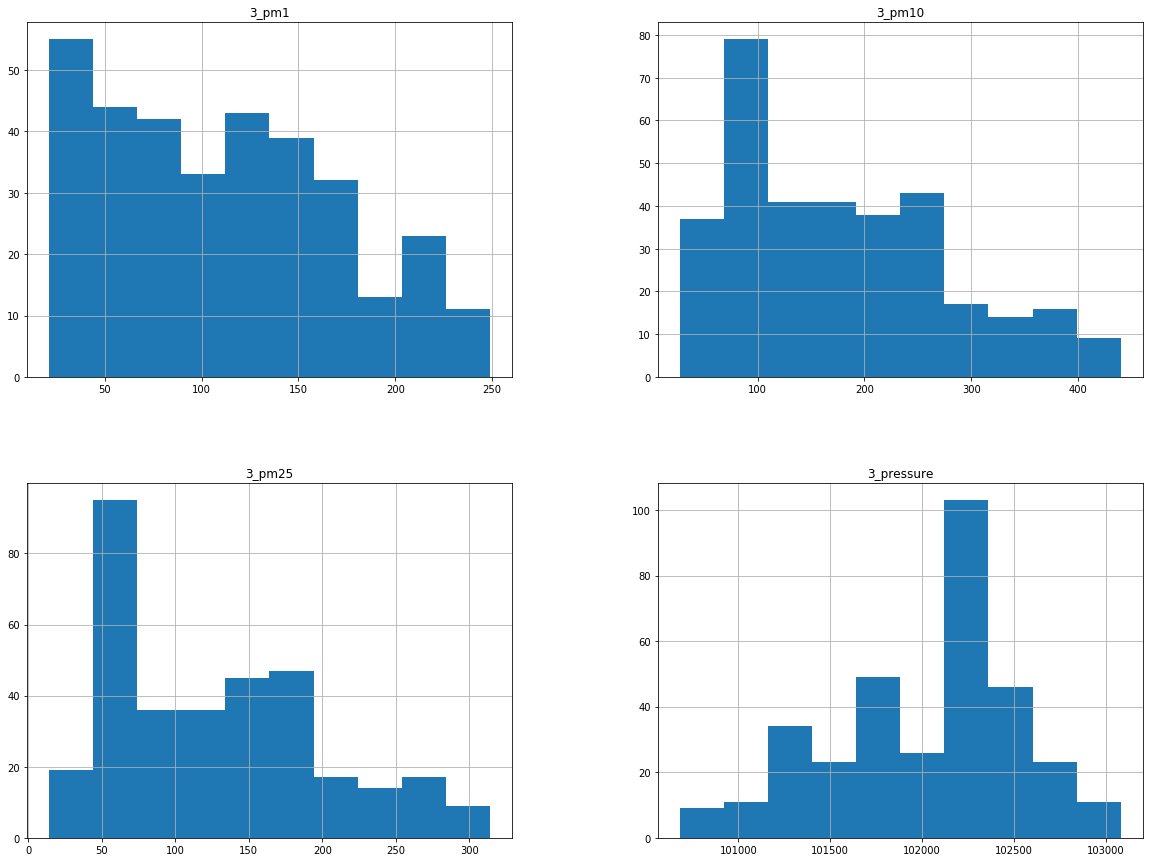

In [49]:
loc3.hist(figsize=(20,15))
plt.show()

In [84]:
tmp = pd.to_datetime(loc3["UTC time"])
loc3 =  loc3.assign(dates= tmp.values)
print(loc3)

               UTC time  3_pressure  3_pm1  3_pm25  3_pm10  \
0   2017-01-01 00:00:00         NaN    NaN     NaN     NaN   
1   2017-01-01 01:00:00         NaN    NaN     NaN     NaN   
2   2017-01-01 02:00:00         NaN    NaN     NaN     NaN   
3   2017-01-01 03:00:00         NaN    NaN     NaN     NaN   
4   2017-01-01 04:00:00         NaN    NaN     NaN     NaN   
5   2017-01-01 05:00:00         NaN    NaN     NaN     NaN   
6   2017-01-01 06:00:00         NaN    NaN     NaN     NaN   
7   2017-01-01 07:00:00         NaN    NaN     NaN     NaN   
8   2017-01-01 08:00:00         NaN    NaN     NaN     NaN   
9   2017-01-01 09:00:00         NaN    NaN     NaN     NaN   
10  2017-01-01 10:00:00         NaN    NaN     NaN     NaN   
11  2017-01-01 11:00:00         NaN    NaN     NaN     NaN   
12  2017-01-01 12:00:00         NaN    NaN     NaN     NaN   
13  2017-01-01 13:00:00         NaN    NaN     NaN     NaN   
14  2017-01-01 14:00:00         NaN    NaN     NaN     NaN   
15  2017

In [78]:
type(loc3["dates"][0])

pandas._libs.tslibs.timestamps.Timestamp

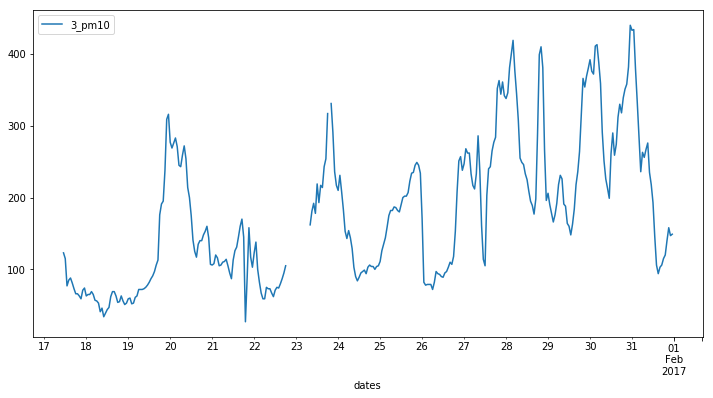

In [76]:
loc3.plot(kind="line",x="dates", y="3_pm10", figsize=(12,6))

In [116]:
corr_matrix = loc3.corr()
corr_matrix

,3_pressure,3_pm1,3_pm25,3_pm10
3_pressure,1.000000,0.371914,0.298535,0.343533
3_pm1,0.371914,1.000000,0.993203,0.994977
3_pm25,0.298535,0.993203,1.000000,0.996329
3_pm10,0.343533,0.994977,0.996329,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa22b526160>,
      dtype=object)

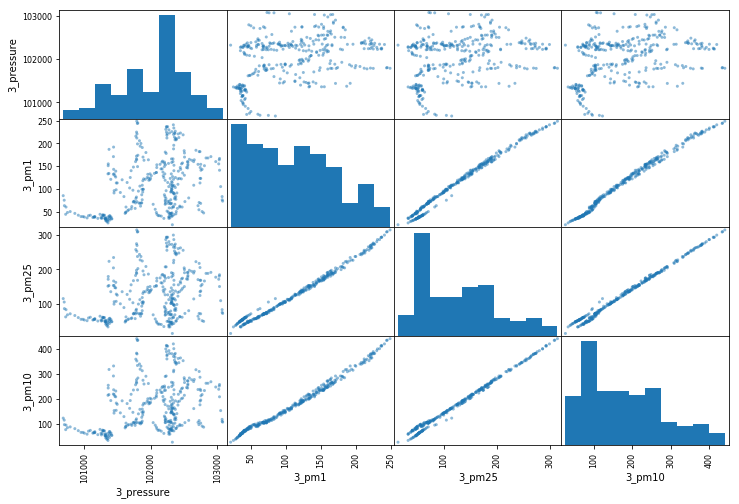

In [119]:
from pandas.plotting import scatter_matrix
scatter_matrix(loc3, figsize=(12,8))

## Dla danego przedziału czasu, znajdź największą średnią wartość pm10

In [114]:
start_date = "2017-01-31T11:00:00"
end_date = "2017-01-31T23:00:00"
pm10_columns = ["UTC time"] + [col for col in airly_data.columns if col.endswith("pm10")]
pm10 = airly_data[pm10_columns]
pm10 = pm10[pm10["UTC time"] >= start_date]
pm10 = pm10[pm10["UTC time"] <= end_date]
pm10['mean'] = pm10.mean(axis=1)
mean_values = pd.DataFrame(pm10.mean(axis=0))
mean_values.columns = ["mean_pm10"]
mean_values[mean_values["mean_pm10"] == mean_values["mean_pm10"].max()]

,mean_pm10
202_pm10,182.076923
